7 Transforming Variables in the Bike Sharing Dataset

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'E:\data set\bike_data.csv'
bike_data= pd.read_csv(file_path)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Calculate skewness of each feature
skewness = bike_data.skew(numeric_only=True)  # Compute skewness for numeric features
skewed_features = skewness[skewness.abs() > 0.5]  # Features with skewness > 0.5
print("Skewed Features:")
print(skewed_features)


Skewed Features:
holiday       5.654224
workingday   -0.793147
weathersit    0.957385
windspeed     0.677345
casual        1.266454
dtype: float64


Transformations

In [8]:
import numpy as np
from scipy import stats
transformed_data = bike_data.copy()
for feature in skewed_features.index:
    if transformed_data[feature].min() > 0:  
        # Log Transformation
        transformed_data[f'{feature}_log'] = np.log1p(transformed_data[feature])
        
        # Square Root Transformation
        transformed_data[f'{feature}_sqrt'] = np.sqrt(transformed_data[feature])
        
        # Box-Cox Transformation
        transformed_data[f'{feature}_boxcox'], _ = stats.boxcox(transformed_data[feature] + 1)  
    else:
        print(f"Skipping Box-Cox transformation for {feature} due to non-positive values.")


Skipping Box-Cox transformation for holiday due to non-positive values.
Skipping Box-Cox transformation for workingday due to non-positive values.


 Visualize the Results

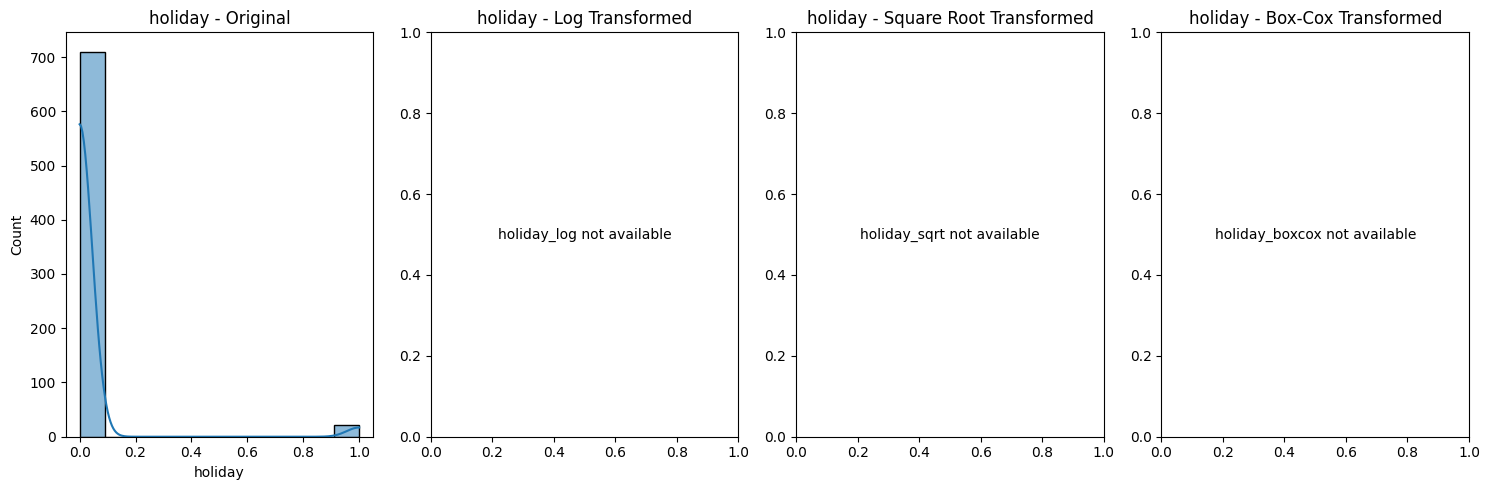

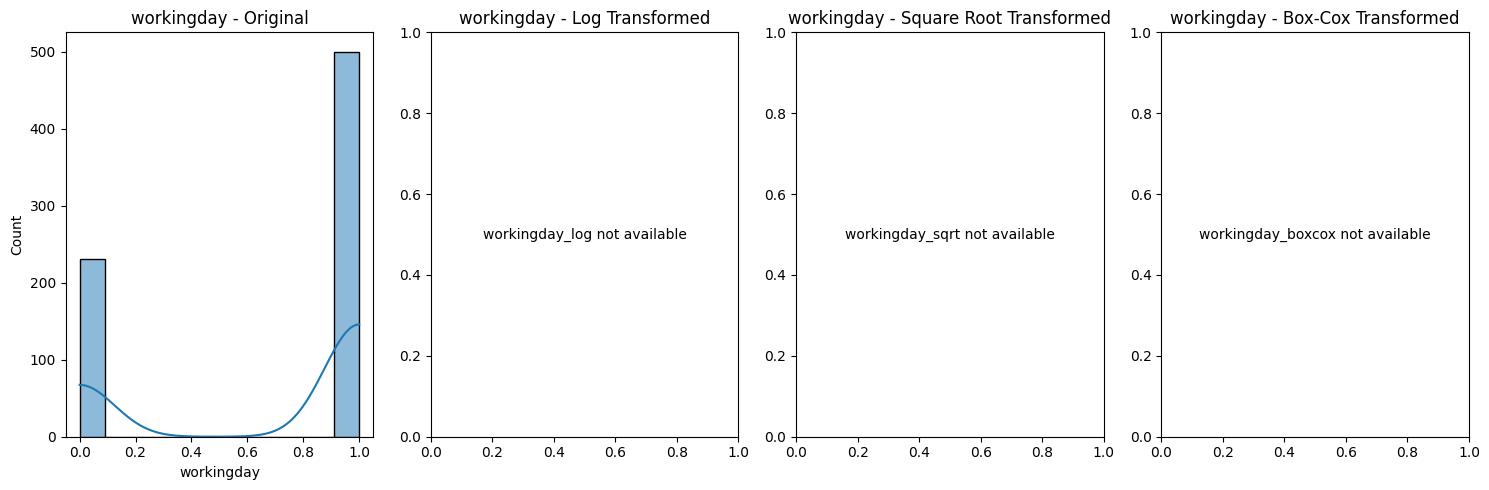

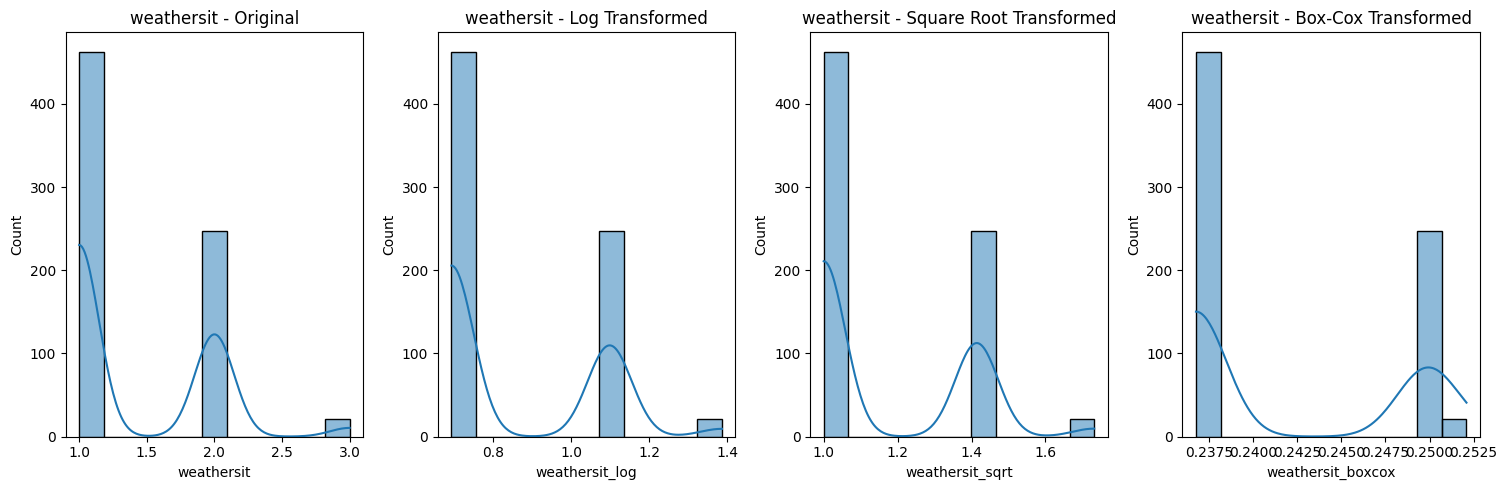

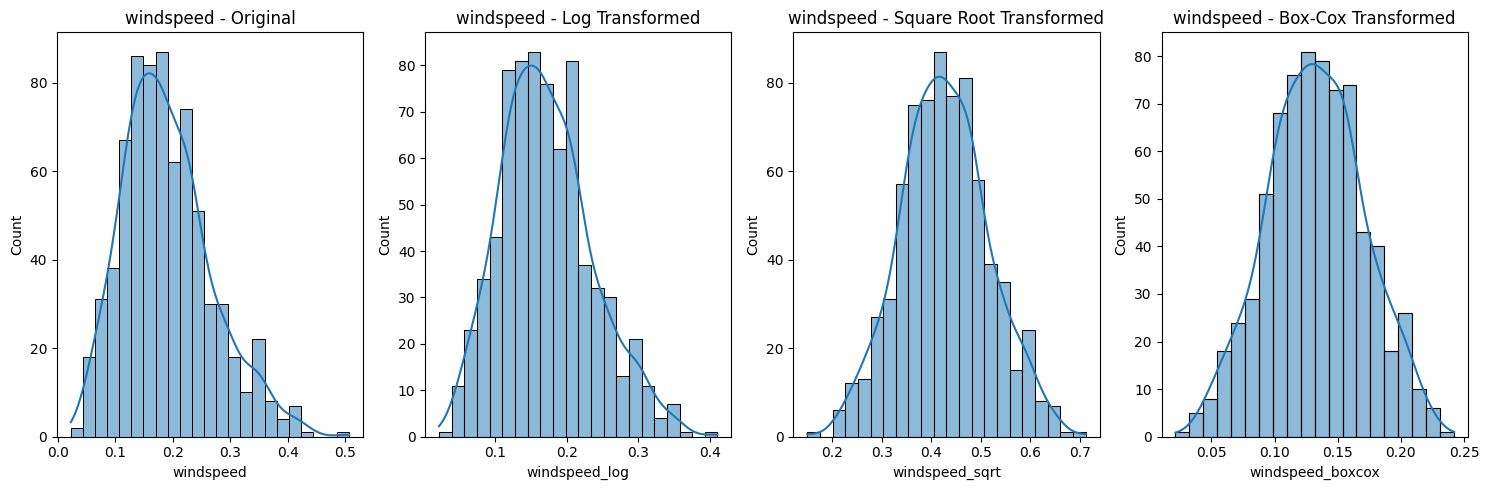

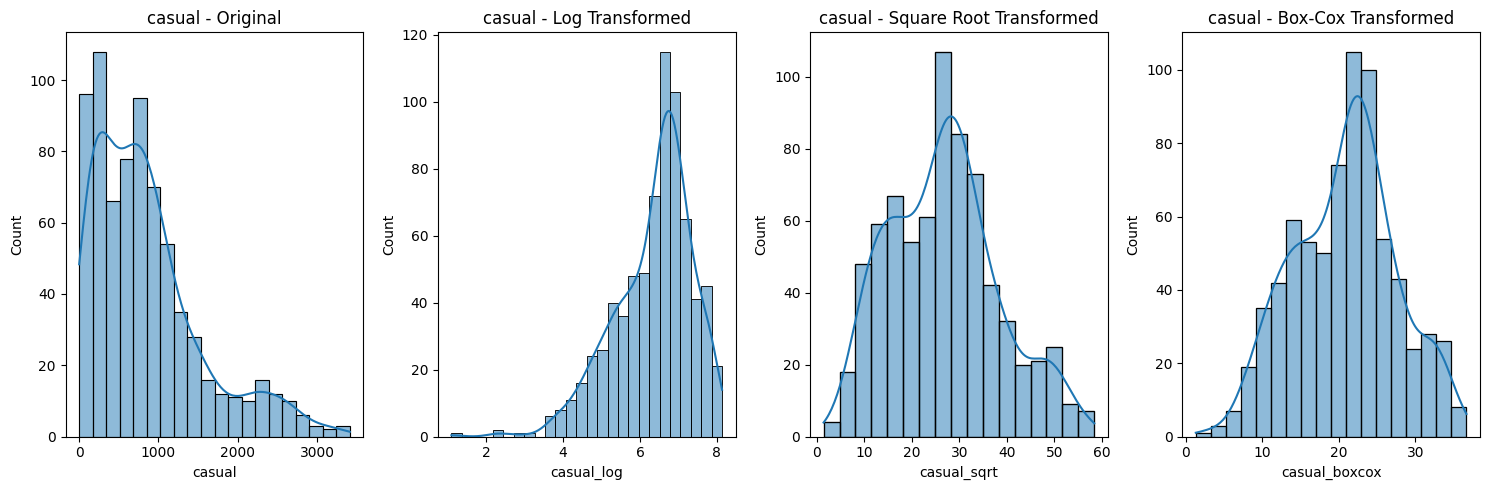

In [13]:
# Plot distributions before and after transformations
for feature in skewed_features.index:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    sns.histplot(bike_data[feature], kde=True)
    plt.title(f'{feature} - Original')

    if f'{feature}_log' in transformed_data.columns:
        plt.subplot(1, 4, 2)
        sns.histplot(transformed_data[f'{feature}_log'], kde=True)
        plt.title(f'{feature} - Log Transformed')
    else:
        plt.subplot(1, 4, 2)
        plt.text(0.5, 0.5, f'{feature}_log not available', ha='center', va='center')
        plt.title(f'{feature} - Log Transformed')

    if f'{feature}_sqrt' in transformed_data.columns:
        plt.subplot(1, 4, 3)
        sns.histplot(transformed_data[f'{feature}_sqrt'], kde=True)
        plt.title(f'{feature} - Square Root Transformed')
    else:
        plt.subplot(1, 4, 3)
        plt.text(0.5, 0.5, f'{feature}_sqrt not available', ha='center', va='center')
        plt.title(f'{feature} - Square Root Transformed')

    if f'{feature}_boxcox' in transformed_data.columns:
        plt.subplot(1, 4, 4)
        sns.histplot(transformed_data[f'{feature}_boxcox'], kde=True)
        plt.title(f'{feature} - Box-Cox Transformed')
    else:
        plt.subplot(1, 4, 4)
        plt.text(0.5, 0.5, f'{feature}_boxcox not available', ha='center', va='center')
        plt.title(f'{feature} - Box-Cox Transformed')

    plt.tight_layout()
    plt.show()
